In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
df = pd.read_csv("online_retail_listing.csv",delimiter=';',encoding="latin-1")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.00,1.12.2009 07:45,"6,95",13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.00,1.12.2009 07:45,"6,75",13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.00,1.12.2009 07:45,"6,75",13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.00,1.12.2009 07:45,"2,1",13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.00,1.12.2009 07:45,"1,25",13085.00,United Kingdom


**Exploratory Data Analysis**



In [4]:
df.shape


(740804, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740804 entries, 0 to 740803
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      740804 non-null  object 
 1   StockCode    740804 non-null  object 
 2   Description  737037 non-null  object 
 3   Quantity     740803 non-null  float64
 4   InvoiceDate  740803 non-null  object 
 5   Price        740803 non-null  object 
 6   Customer ID  571465 non-null  float64
 7   Country      740803 non-null  object 
dtypes: float64(2), object(6)
memory usage: 45.2+ MB


In [6]:
df["Description"].nunique()

5053

In [7]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    4774
REGENCY CAKESTAND 3 TIER              3361
STRAWBERRY CERAMIC TRINKET BOX        2295
JUMBO BAG RED RETROSPOT               2204
ASSORTED COLOUR BIRD ORNAMENT         2113
Name: Description, dtype: int64

In [8]:
#What is the most ordered product? 
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,83072.00
WHITE HANGING HEART T-LIGHT HOLDER,76931.00
ASSORTED COLOUR BIRD ORNAMENT,59338.00
BROCADE RING PURSE,58816.00
JUMBO BAG RED RETROSPOT,50286.00


In [9]:
df["Price"]

0         6,95
1         6,75
2         6,75
3          2,1
4         1,25
          ... 
740799    1,45
740800    2,95
740801    2,95
740802    3,25
740803     NaN
Name: Price, Length: 740804, dtype: object

In [10]:
df["Price"] = df["Price"].apply(lambda x: float(str(x).replace(',','.')))
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.00,1.12.2009 07:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12.00,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12.00,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.00,1.12.2009 07:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.00,1.12.2009 07:45,1.25,13085.00,United Kingdom,30.00


In [11]:
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head(10)

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24
489439,426.30
489440,50.40
489441,344.34
489442,382.37


In [12]:
df.groupby("Description").agg({"Price":"max"}).sort_values("Price", ascending = False).head()

,Price
Description,
Manual,25111.09
Bank Charges,18910.69
AMAZON FEE,16888.02
POSTAGE,8142.75
Adjustment by john on 26/01/2010 17,5117.03


In [13]:
#How many orders came from which country?
df["Country"].value_counts().head()

United Kingdom    684102
EIRE               12236
Germany            12006
France              8910
Netherlands         3755
Name: Country, dtype: int64

In [14]:
returned = df[df["Invoice"].str.contains("C",na=False)] #加上df[]，是為了將Series轉成Dataframe
returned.sort_values("Quantity", ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215.00,18.01.2011 10:17,1.04,12346.00,United Kingdom,-77183.60
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.00,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.00,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128.00,28.09.2010 11:02,0.08,14277.00,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008.00,28.09.2010 11:02,0.13,14277.00,France,-911.04


**Missing value analysis**

In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      3767
Quantity            1
InvoiceDate         1
Price               1
Customer ID    169339
Country             1
TotalPrice          1
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isnull().sum() #把null值刪除，不須提供變數去接

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

Outlier value analysis

In [17]:
for feature in ["Quantity","Price","TotalPrice"]: #feature是string，df[featue]，是把那一列取下
  Q1 = df[feature].quantile(0.01)
  Q3 = df[feature].quantile(0.99)

  IQR = Q3-Q1
  upper = Q3+1.5*IQR
  lower = Q1-1.5*IQR

  if df[(df[feature]>upper)|(df[feature]<lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature]>upper)|(df[feature]<lower)].shape[0])
  else:
        print(feature, "no")

Quantity yes
1506
Price yes
1306
TotalPrice yes
1441


In [18]:
df = df[~df["Invoice"].str.contains("C", na = False)] #選出dataframe裡不含發票為C開頭的 --> ~就是「反選」
df["Customer ID"] = df["Customer ID"].astype(int) #轉成整數

#astype(int) 在 Pandas 中將浮點數 float 轉換為整型 int
#to_numeric() 方法將 Pandas 中的 float 轉換為 int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
print("Min Date", df["InvoiceDate"].min(), "Max Date", df["InvoiceDate"].max())

Min Date 1.02.2010 08:13 Max Date 9.12.2010 20:01


In [20]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #轉為日期時間
d = dt.datetime(2012,1,1,0,0) # dt-->datetime 2012-01-01 00:00:00
g = df.groupby("Customer ID").agg({"InvoiceDate":"max"}) #挑出每一個customer id最近的購買日期
recency = (dt.datetime(2012,1,1,0,0)-df.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
#第一階段Recency會有時分秒 recency->dataframe
recency["Recency"] = recency["Recency"].apply(lambda x: x.days) #第二階段的Recency沒有時分秒，用.days只取日期
recency.sort_values(by="Recency",ascending=False).head()

,Recency
Customer ID,
12636,1083
14654,1083
17592,1083
17056,1083
13526,1083


In [21]:
freq = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate":"Frequency"}) 
#計算每個customor id購買的次數

freq.sort_values(by="Frequency",ascending=False).head()

,Frequency
Customer ID,
14911,258
12748,215
15311,161
13089,156
17850,151


In [22]:
monetary = df.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary.head()

,Monetary
Customer ID,
12346,77556.46
12347,3146.75
12348,1709.40
12349,2671.14
12350,334.40


Create RFM score

In [23]:
rfm = pd.concat([recency,freq,monetary],axis=1) #axis=1-->橫向合併 axis=0-->縱向合併
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,180,4,3146.75
12348,241,4,1709.40
12349,429,3,2671.14
12350,332,1,334.40


In [24]:
rfm["RecencyScore"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["FrequencyScore"]=pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["MonetaryScore"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,347,12,77556.46,3,5,5
12347,180,4,3146.75,5,3,5
12348,241,4,1709.40,4,3,4
12349,429,3,2671.14,2,3,5
12350,332,1,334.40,3,1,2


In [25]:
rfm["Frequency"] #Frequency有太多一樣的值,ex:1，所以必須搭配rank做使用(Bin edges must be unique: array([  1.,   1.,   2.,   4.,   8., 391.]).
#You can drop duplicate edges by setting the 'duplicates' kwarg)
#上述的rfm["Frequency"]若用duplicates="drop",會出現報錯Bin labels must be one fewer than the number of bin edges,把labels變成[1,2,3,4]即可，但是這樣背離原意
#因此用rank將其排名就可以變成不同的值，因排名都不會重複


Customer ID
12346    12
12347     4
12348     4
12349     3
12350     1
         ..
18283    11
18284     1
18285     1
18286     2
18287     5
Name: Frequency, Length: 4957, dtype: int64

In [26]:
rfm["RFM_SCORE"] = (rfm["RecencyScore"].astype(str)+rfm["FrequencyScore"].astype(str)+rfm["MonetaryScore"].astype(str))
rfm.head()


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,347,12,77556.46,3,5,5,355
12347,180,4,3146.75,5,3,5,535
12348,241,4,1709.40,4,3,4,434
12349,429,3,2671.14,2,3,5,235
12350,332,1,334.40,3,1,2,312


In [27]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
#r是正規表達法

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm["Segment"] = rfm["Segment"].replace(seg_map,regex=True) #regex=True表示要使用正規表達法
rfm.head()          #replace這邊表示seg_map內容值替代掉原本的數字

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,347,12,77556.46,3,5,5,355,Loyal Customers
12347,180,4,3146.75,5,3,5,535,Potential Loyalists
12348,241,4,1709.40,4,3,4,434,Potential Loyalists
12349,429,3,2671.14,2,3,5,235,At Risk
12350,332,1,334.40,3,1,2,312,About to Sleep


Summary Statics

In [28]:
rfmStats = rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","median","count","std"])

rfmStats

Recency                     Frequency                     \
                       mean median count    std      mean median count   std   
Segment                                                                        
About to Sleep       353.30 360.00   345  40.95      1.26   1.00   345  0.44   
At Risk              490.54 467.00   674  76.70      3.21   3.00   674  1.19   
Can't Loose          454.74 444.00    54  45.51     11.63   8.00    54 19.51   
Champions            104.82  90.00   711  59.29     15.50   9.00   711 21.43   
Hibernating          569.20 549.00  1249 132.16      1.18   1.00  1249  0.38   
Loyal Customers      289.45 275.00   996  62.13      8.41   7.00   996  5.90   
Need Attention       362.84 382.50   236  38.69      2.61   3.00   236  0.52   
New Customers        122.58 119.00    66  60.02      1.00   1.00    66  0.00   
Potential Loyalists  193.76 221.00   525  77.53      2.22   2.00   525  0.76   
Promising            251.31 254.00   101  23.24      1.00   1.00   101  0.00   

                    Monetary                         
                        mean  median count      std  
Segment                                              
About to Sleep        425.27  304.90   345   438.30  
At Risk              1236.58  824.60   674  1878.20  
Can't Loose          4436.61 2473.32    54  8283.46  
Champions            8839.17 3500.79   711 26784.13  
Hibernating           434.43  282.05  1249   803.67  
Loyal Customers      3530.12 2174.27   996  5890.83  
Need Attention        851.84  672.55   236   674.71  
New Customers         384.14  299.73    66   367.54  
Potential Loyalists   826.19  567.58   525  2046.17  
Promising             388.12  282.88   101   305.76

In [29]:
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip("|") #不知道strip加上的差別，需要註記
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,353.30,360.00,345,40.95,1.26,1.00,345,0.44,425.27,304.90,345,438.30
At Risk,490.54,467.00,674,76.70,3.21,3.00,674,1.19,1236.58,824.60,674,1878.20
Can't Loose,454.74,444.00,54,45.51,11.63,8.00,54,19.51,4436.61,2473.32,54,8283.46
Champions,104.82,90.00,711,59.29,15.50,9.00,711,21.43,8839.17,3500.79,711,26784.13
Hibernating,569.20,549.00,1249,132.16,1.18,1.00,1249,0.38,434.43,282.05,1249,803.67
Loyal Customers,289.45,275.00,996,62.13,8.41,7.00,996,5.90,3530.12,2174.27,996,5890.83
Need Attention,362.84,382.50,236,38.69,2.61,3.00,236,0.52,851.84,672.55,236,674.71
New Customers,122.58,119.00,66,60.02,1.00,1.00,66,0.00,384.14,299.73,66,367.54
Potential Loyalists,193.76,221.00,525,77.53,2.22,2.00,525,0.76,826.19,567.58,525,2046.17


In [30]:
rfm_kmeans = rfm.loc[:,"Recency":"Monetary"] #取前Recency到Monetary的資料
rfm_kmeans

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,180,4,3146.75
12348,241,4,1709.40
12349,429,3,2671.14
12350,332,1,334.40
...,...,...,...
18283,213,11,1176.82
18284,630,1,461.68
18285,682,1,427.00


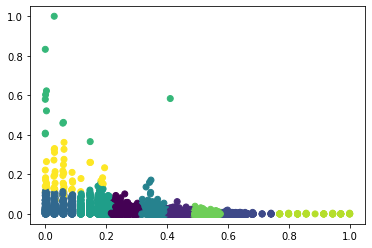

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
dataframe = sc.fit_transform(rfm_kmeans) 
#dataframe.ndim 用ndim看維度有幾維
kmeans = KMeans(n_clusters=10) #分成10個群組
k_fit = kmeans.fit(dataframe) #開始訓練
k_fit.labels_ #取得預測結果
plt.scatter(dataframe[:,0],dataframe[:,1], c=k_fit.labels_)

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

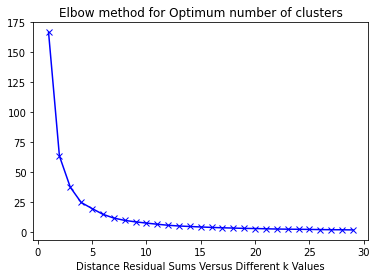

In [32]:
ssd = []
K = range(1,30)
for k in K:
  kmeans = KMeans(n_clusters=k).fit(dataframe) #kmeans為預測結果
  ssd.append(kmeans.inertia_) #kmeans.inertia獲取聚類均值向量的總和
plt.plot(K, ssd,"bx-") #將每個聚類均值向量的總和標出來
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters") #elbow method-->手肘法

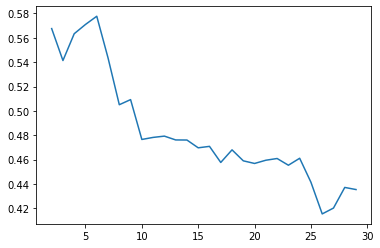

In [33]:
#側影係數
from sklearn.metrics import silhouette_score
K = range(2,30)
scores = []
for i in K:
    kmeans = KMeans(n_clusters=i).fit(dataframe)
    # distortions.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(dataframe, kmeans.labels_)) # 側影係數

# 找出最大的側影係數來決定 K 值
# selected_K = scores.index(max(scores)) + 2

# 重新建立 KMeans 模型並預測目標值
# kmeans = KMeans(n_clusters=selected_K).fit(dataframe)
# new_dy = kmeans.predict(dataframe)

# # 繪製係數圖
# plt.subplot(224)
# plt.title('Silhouette score')
# plt.plot(K, scores)
# plt.plot(selected_K, scores[selected_K - 2], 'go') # 最佳解
plt.plot(range(2,30), scores)

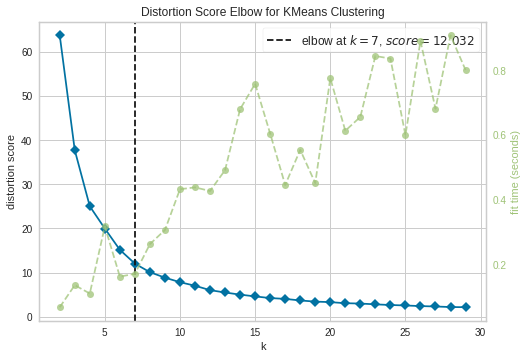

In [34]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,30))
visu.fit(dataframe)
visu.poof();

In [35]:
kmeans = KMeans(n_clusters = 6).fit(dataframe)
cluster = kmeans.labels_
pd.DataFrame({"Customer ID": rfm.index, "Cluster": cluster})
rfm_kmeans["cluster_no"] = cluster
rfm_kmeans["cluster_no"] = rfm_kmeans["cluster_no"] + 1
rfm_kmeans.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,347,12,77556.46,4
12347,180,4,3146.75,1
12348,241,4,1709.40,1
12349,429,3,2671.14,4
12350,332,1,334.40,1


In [36]:
import plotly.express as px
fig = px.scatter_3d(rfm_kmeans, x=rfm_kmeans["Recency"], y=rfm_kmeans["Frequency"], z=rfm_kmeans["Monetary"], color=rfm_kmeans["cluster_no"])
fig.show()